[Link to Kaggle Dataset](https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement)

In [38]:
import pandas as pd

In [39]:
data = pd.read_csv('Datasets/Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [40]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## Problem in Hand

The aim here is to predict the salary based on the qualifications of the candidates as available or the least case to predict whether the candidate will be placed or not. Ultimately the attempt is to figure out what are the key factors which decide the selection of a candidate.

## Data Analysis

Using the data descriptions available as follows: 

`sl_no` : Serial Number 

`gender` : Gender- Male='M', Female='F' 

`ssc_p` : Secondary Education percentage- 10th Grade

`ssc_b` : Board of Education- Central/Others

`hsc_p` : Higher Secondary Education percentage- 12th Grade

`hsc_b` : Board of Education- Central/Others

`hsc_s` : Specialization in Higher Secondary Education

`degree_p` : Degree Percentage

`degree_t` : Under Graduation(Degree type)- Field of degree education

`workex` : Work Experience

`etest_p` : Employability test percentage (conducted by college)

`specialisation` : Post Graduation(MBA)- Specialization

`mba_p` : MBA percentage

`status` : Status of placement- Placed/Not placed

`salary` : Salary offered by corporate to candidates


Right now as an intial look-through, few difficulties present themselves like the presence of different boards which makes judging the percentages at the same level unfair and most probably inaccurate. So we will look at options where those are handled appropriately. But due to lack of data among the other boards(boards only having 2 choices `Central` and `Others`, basically having no division inside the non-central boards), we will have no choice other than to consider all `Others` boards entry equivalent.

Also here an oppurtunity presents itself, that is replacing all `NaN` values in the salary column with 0, though that might make sense in its literal terms but it would highly skew the results towards a lower salary as the difference in the qualities of someone placed and someone not placed might not be as major as the difference in 0 and some XX...XX salary would suggest.

Hence as an initial outlook, we now have two options that is using two distinct models; one to classify placed and not placed and one to predict the salary, and only present the salary if the candidate is classified as placed (We will can this Plan A); alternatively we can just use a regressive model to predict a salary and only classify the candidate as placed if it is above a certain threshold (Plan B).

Now Plan B might seem simpler but it has an issue that it will never present a salary lower than the threshold which might be possible, so Plan A as of now seems the more sensible choice as it is more flexible in terms of the ability of Status(Placed/Not Placed) and Salary being able to depend on different factors.

## Encoding the Data

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import numpy as np

In [43]:
copydata=data

In [44]:
data['status']=data['status'].replace(['Placed','Not Placed'],[1,0])
data['workex']=data['workex'].replace(['Yes','No'],[1,0])

In [45]:
tr = make_column_transformer((OneHotEncoder(),['gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation']), remainder='passthrough')
data = pd.DataFrame(tr.fit_transform(data),columns=tr.get_feature_names_out())

In [46]:
data.head()

,onehotencoder__gender_F,onehotencoder__gender_M,onehotencoder__ssc_b_Central,onehotencoder__ssc_b_Others,onehotencoder__hsc_b_Central,onehotencoder__hsc_b_Others,onehotencoder__hsc_s_Arts,onehotencoder__hsc_s_Commerce,onehotencoder__hsc_s_Science,onehotencoder__degree_t_Comm&Mgmt,...,onehotencoder__specialisation_Mkt&HR,remainder__sl_no,remainder__ssc_p,remainder__hsc_p,remainder__degree_p,remainder__workex,remainder__etest_p,remainder__mba_p,remainder__status,remainder__salary
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,67.00,91.00,58.00,0.0,55.0,58.80,1.0,270000.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,2.0,79.33,78.33,77.48,1.0,86.5,66.28,1.0,200000.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,3.0,65.00,68.00,64.00,0.0,75.0,57.80,1.0,250000.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,4.0,56.00,52.00,52.00,0.0,66.0,59.43,0.0,NaN
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,5.0,85.80,73.60,73.30,0.0,96.8,55.50,1.0,425000.0


## Visualisation

array([[<AxesSubplot:title={'center':'onehotencoder__gender_F'}>,
        <AxesSubplot:title={'center':'onehotencoder__gender_M'}>,
        <AxesSubplot:title={'center':'onehotencoder__ssc_b_Central'}>,
        <AxesSubplot:title={'center':'onehotencoder__ssc_b_Others'}>,
        <AxesSubplot:title={'center':'onehotencoder__hsc_b_Central'}>],
       [<AxesSubplot:title={'center':'onehotencoder__hsc_b_Others'}>,
        <AxesSubplot:title={'center':'onehotencoder__hsc_s_Arts'}>,
        <AxesSubplot:title={'center':'onehotencoder__hsc_s_Commerce'}>,
        <AxesSubplot:title={'center':'onehotencoder__hsc_s_Science'}>,
        <AxesSubplot:title={'center':'onehotencoder__degree_t_Comm&Mgmt'}>],
       [<AxesSubplot:title={'center':'onehotencoder__degree_t_Others'}>,
        <AxesSubplot:title={'center':'onehotencoder__degree_t_Sci&Tech'}>,
        <AxesSubplot:title={'center':'onehotencoder__specialisation_Mkt&Fin'}>,
        <AxesSubplot:title={'center':'onehotencoder__specialisation_M

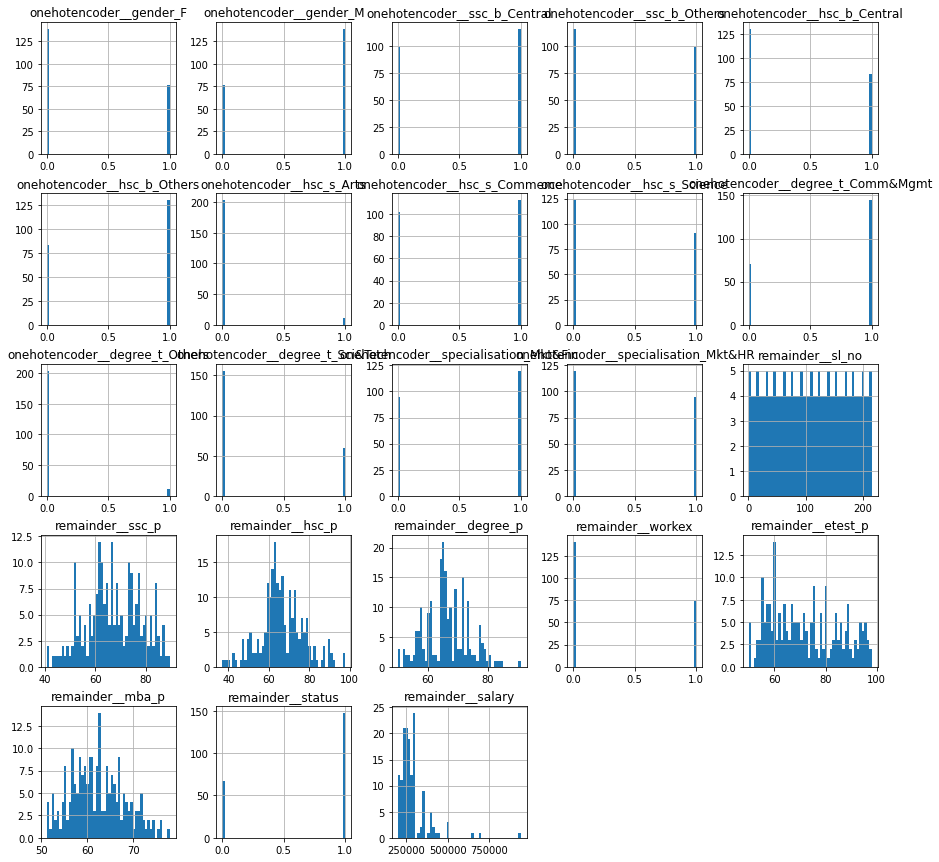

In [47]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(15,15))

## Finding Correlations

In [48]:
correlations_status=data.corr()['remainder__status'].sort_values(ascending=False)
correlations_salary=data.corr()['remainder__salary'].sort_values(ascending=False)
print("Status Correlations:\n",correlations_status)
print("Salary Correlations:\n",correlations_salary)

Status Correlations:
 remainder__status                        1.000000
remainder__ssc_p                         0.607889
remainder__hsc_p                         0.491228
remainder__degree_p                      0.479861
remainder__workex                        0.276060
onehotencoder__specialisation_Mkt&Fin    0.250655
remainder__etest_p                       0.127639
onehotencoder__gender_M                  0.090670
remainder__mba_p                         0.076922
onehotencoder__degree_t_Comm&Mgmt        0.046849
onehotencoder__ssc_b_Others              0.037297
onehotencoder__hsc_s_Commerce            0.024414
onehotencoder__hsc_b_Others              0.016945
onehotencoder__degree_t_Sci&Tech         0.008688
onehotencoder__hsc_s_Science             0.007279
onehotencoder__hsc_b_Central            -0.016945
remainder__sl_no                        -0.026859
onehotencoder__ssc_b_Central            -0.037297
onehotencoder__hsc_s_Arts               -0.071653
onehotencoder__gender_F     

The above correlation values show that being from non-Central boards has a very very slight positive impact in being selected but hardly any conclusive impact on the salary once employed.

We will try out different classifying algorithms on the dataset and accordingly use the best performing algorithm.

### Splitting data into training data and test data (for status classification and salary regression)

In [49]:
from sklearn.model_selection import train_test_split
#for classifier, all data can be used
x_status = data.drop(['remainder__status', 'remainder__salary'], axis=1)
y_status = data['remainder__status']
#for salary prediction only non-NaN entries being used
x_salary = data[data['remainder__salary'].notna()].drop(['remainder__status', 'remainder__salary'], axis=1)
y_salary = data[data['remainder__salary'].notna()]['remainder__salary']
#splitting into training and test data
x_status_train, x_status_test, y_status_train, y_status_test = train_test_split(x_status, y_status, test_size=0.2, random_state=42)
x_salary_train, x_salary_test, y_salary_train, y_salary_test = train_test_split(x_salary, y_salary, test_size=0.2, random_state=42)

## Trying out different Classification Models (doing CV)

In [82]:
import xgboost
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree

Cross Validation Accuracy of SVM = 0.6980392156862745 with Std. Deviation = 0.04037502016073332
Cross Validation Accuracy of Decision Tree = 0.7552287581699346 with Std. Deviation = 0.1098199684819682
Cross Validation Accuracy of Random Forest = 0.8728758169934642 with Std. Deviation = 0.06601711629363079
Cross Validation Accuracy of XG-Boost = 0.8545751633986928 with Std. Deviation = 0.07901809412693528
Cross Validation Accuracy of KNN = 0.7905228758169935 with Std. Deviation = 0.07552414142153453


/home/sanidhyas3s/anaconda3/envs/sanidhya/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sanidhyas3s/anaconda3/envs/sanidhya/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Cross Validation Accuracy of Logistic Regression = 0.8549019607843137 with Std. Deviation = 0.07012374408724574


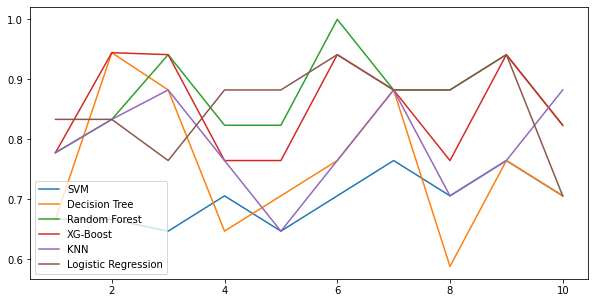

In [87]:
c0 = ("SVM",svm.SVC(random_state=42))
c1 = ("Decision Tree",tree.DecisionTreeClassifier(random_state=42))
c2 = ("Random Forest",RandomForestClassifier(random_state=42))
c3 = ("XG-Boost",xgboost.XGBClassifier(random_state=42))
c4 = ("KNN",KNeighborsClassifier())
c5 = ("Logistic Regression",LogisticRegression())
classifiers = [c0,c1,c2,c3,c4,c5]

plt.figure(figsize=(10,5))
for c in classifiers:
    scores = cross_val_score(c[1],x_status_train,y_status_train, scoring="accuracy",cv=10)
    print(f"Cross Validation Accuracy of {c[0]} = {scores.mean()} with Std. Deviation = {scores.std()}")
    plt.plot(range(1,11),scores,label=c[0])
    # c[1].fit(x_status_train,y_status_train)
    # y_pred = c[1].predict(x_status_test)
    # print("Accuracy of %s: %s"%(c[0], accuracy_score(y_status_test, y_pred)))
    # print("Confusion Matrix of %s: %s\n"%(c[0], confusion_matrix(y_status_test, y_pred)))
plt.title("Accuracy of Classifiers")
plt.legend()
plt.show()


## Trying out differente Regressors

Cross Validation RMS Error of LinearRegression() = 86668.91344599253 with Std. Deviation = 39638.90925144023
Cross Validation RMS Error of RandomForestRegressor() = 86226.08089396489 with Std. Deviation = 46255.588530836925
Cross Validation RMS Error of DecisionTreeRegressor() = 127946.29684082256 with Std. Deviation = 57203.991468005435


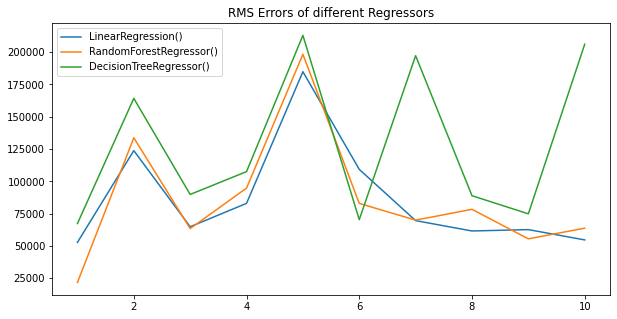

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

r0 = LinearRegression()
r1 = RandomForestRegressor()
r2 = tree.DecisionTreeRegressor()

regressors  = [r0,r1,r2]

plt.figure(figsize=(10,5))
for r in regressors:
    scores = cross_val_score(r,x_salary_train,y_salary_train, scoring="neg_mean_squared_error",cv=10)
    print(f"Cross Validation RMS Error of {r} = {np.sqrt(-scores).mean()} with Std. Deviation = {np.sqrt(-scores).std()}")
    plt.plot(range(1,11),np.sqrt(-scores),label=r) #nsqrt of neg of neg mean sq error --> root mean sq error
plt.title("RMS Errors of different Regressors")
plt.legend()
plt.show()

###### References used: [1](https://datagy.io/sklearn-one-hot-encode/), [2](https://medium.datadriveninvestor.com/choosing-the-best-algorithm-for-your-classification-model-7c632c78f38f)